In [1]:
import pandas as pd
import numpy as np

bike_weather = pd.read_csv('bike_weather.csv')
bike_weather

,Date_out,Time_out,Count,date,time,cum_precipitation,humidity,insolation,pressure,sea_lvl_pressure,sunshine,temp,wind,wind_direction,Rain_YN,N,Y,over_500
0,2019-10-03,1,64,2019-10-03,1,2.361667,93.846667,0.00,993.010000,1002.910000,0,20.016667,3.290000,178.788333,Y,0,1,0
1,2019-10-03,2,73,2019-10-03,2,3.353333,93.453333,0.00,992.668333,1002.568333,0,19.908333,3.056667,333.400000,Y,0,1,0
2,2019-10-03,3,78,2019-10-03,3,3.930000,91.686667,0.00,992.253333,1002.153333,0,19.923333,2.125000,330.110000,Y,0,1,0
3,2019-10-03,4,57,2019-10-03,4,4.423333,93.061667,0.00,992.316667,1002.216667,0,19.928333,1.931667,251.535000,Y,0,1,0
4,2019-10-03,5,43,2019-10-03,5,4.500000,95.028333,0.00,992.835000,1002.735000,0,19.871667,2.886667,236.116667,Y,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2019-10-05,19,648,2019-10-05,19,0.600000,60.570000,8.24,1008.340000,1018.440000,8400,17.171667,4.085000,146.493333,Y,0,1,1
65,2019-10-05,20,619,2019-10-05,20,0.600000,61.381667,8.24,1009.146667,1019.273333,8400,16.610000,3.631667,125.785000,Y,0,1,1
66,2019-10-05,21,664,2019-10-05,21,0.600000,62.598333,8.24,1009.773333,1019.973333,8400,15.988333,3.686667,225.700000,Y,0,1,1
67,2019-10-05,22,585,2019-10-05,22,0.600000,63.560000,8.24,1010.376667,1020.576667,8400,15.436667,3.680000,225.253333,Y,0,1,1


In [8]:
import os

os.environ['PATH'] += os.pathsep + 'c:/Program Files (x86)/Graphviz7.0.6/bin/'

In [2]:
from sklearn.model_selection import train_test_split

X = bike_weather[['cum_precipitation', 'humidity', 'temp', 'wind']]
y = bike_weather.over_500
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [9]:
from sklearn import tree

X = X_train
y = y_train
dTree = tree.DecisionTreeClassifier()
dTreeModel = dTree.fit(X, y)
dTreeModel

DecisionTreeClassifier()

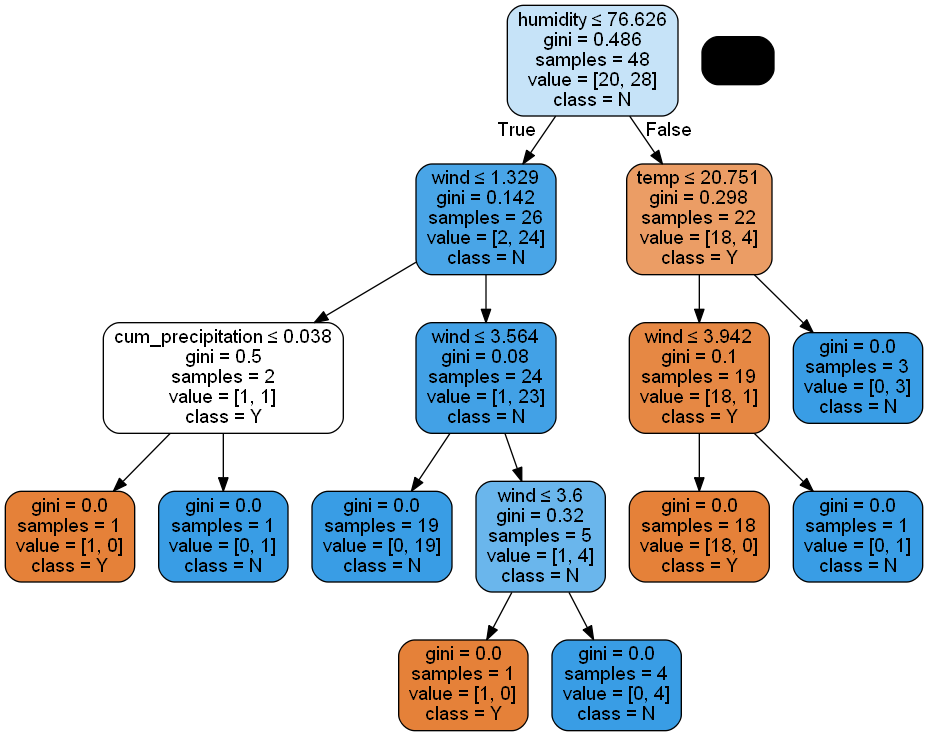

In [12]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dTreeModel, out_file = None, feature_names = ['cum_precipitation', 'humidity', 'temp', 'wind'], 
                          class_names = ('Y', 'N'), filled = True, rounded = True, special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

출발점 : 루트 노드  
각 노드의 첫 줄에는 분류 기준 항목과 기준값이 있음  / 분류 기준 : Feature  
- cum_precipitation
- wind
- temp
- humidity

gini : 불순도 / 항상 불순도가 낮아지도록 분기하는 것이 의사결정나무를 만드는 규칙  
sample : 해당 노드에 도달한 데이터의 갯수  
value : 샘플을 구성하고 있는 것들이 어떻게 구조가 되어 있는지를 알려주는 값  

In [13]:
dTreeModel.predict(X_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score

y_pred = dTreeModel.predict(X_test)
print('Accuracy : %.2f'%accuracy_score(y_test, y_pred))

Accuracy : 0.81


In [16]:
from sklearn.metrics import classification_report

y_pred = dTreeModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.79      0.92      0.85        12

    accuracy                           0.81        21
   macro avg       0.82      0.79      0.80        21
weighted avg       0.82      0.81      0.80        21

